In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
plt.style.use('ggplot')

In [2]:
sequences = np.load('/Users/anastasiiashcherbakova/Desktop/1_data_scrapping/cleaned_sequences.npy', allow_pickle=True)

In [3]:
sequences.shape

(10304,)

In [4]:
NT_embeddings = np.load('/Users/anastasiiashcherbakova/Desktop/nucleotide_transformer_embeddings.npy', allow_pickle=True)

In [5]:
sequences

array(['ATGAATACCCGTACCCGTCCGACCACCACACCGGTTCCGCCTGTTGAAGAAACCCGTTATGAAGAAGAACTGGCACACGGTCTGGTTAAAGCAGATGAAGATGCATTTGCAGCCATTTATCGTCGTTGGGGTAGCCTGGTTCATACCCTGGCAACCCGTAGCCTGGGTGATGCACATGAAGCAGAAGATGTTACCCAGCAGGTTTTTGTTGGTGCATGGCGTGGTCGTCATGGTTTTCGTCCGGAACGTGGCACCCTGGGAGCGTGGCTGGTTGGTATTACCCGTCGTAAAGTTGTTGATGCACTGGCAGCACGCACCCGTCGTCTGAGCCTGGTTGAAAGCGCAGGTCAGGATATTACACCGGCACGTCTGGTTCAGCCTGCACTGGATGAAGTTCTGGATCGTGTTCTGCTGGTTGAAGCACTGAGCCGTCTGCCGCAGGCACAGCGTGATGTTCTGTGTATGGCATTTTATGAAGATCTGACCCAGGCACAGATTGCAGAACGTACCGGTGTTCCGCTGGGCACCGTTAAAAGCCATGCACGTCGTGGTCTGCATCGTCTGCGTACCGCAGTTGGTCCGGGTGCAGCACATGATACCTGTGTTTAAGGATCCAAGCTTGCGGCCGCACTCGAGCACCACCACCACCACCACTGAGATCCGGCTGCTAACAAAGCCCGAAAGGAAGCTGAGTTGGCTGCTGCCACCGCTGAGCAATAACTAGCATAACCCCTTGGGGCCTCTAAACGGGTCTTGAGGGGTTTTTTGCTGAAAGGAGGAACTATATCCGGATTGGCGAATGGGACGCGCCCTGTAGCGGCGCATTAAGCGCGGCGGGTGTGGTGGTTACGCGCAGCGTGACCGCTACACTTGCCAGCGCCCTAGCGCCCGCTCCTTTCGCTTTCTTCCCTTCCTTTCTCGCCACGTTCGCCGGCTTTCCCCGTCAAGCTCTAAATCGGGGGCTCCCTTTAGGGTTCCGATTTAGTGCTTTA

In [6]:
sequence_lengths = np.array([len(seq) for seq in sequences])

In [7]:
mean = np.mean(sequence_lengths)
median = np.median(sequence_lengths)
min_value = np.min(sequence_lengths)
max_value = np.max(sequence_lengths)

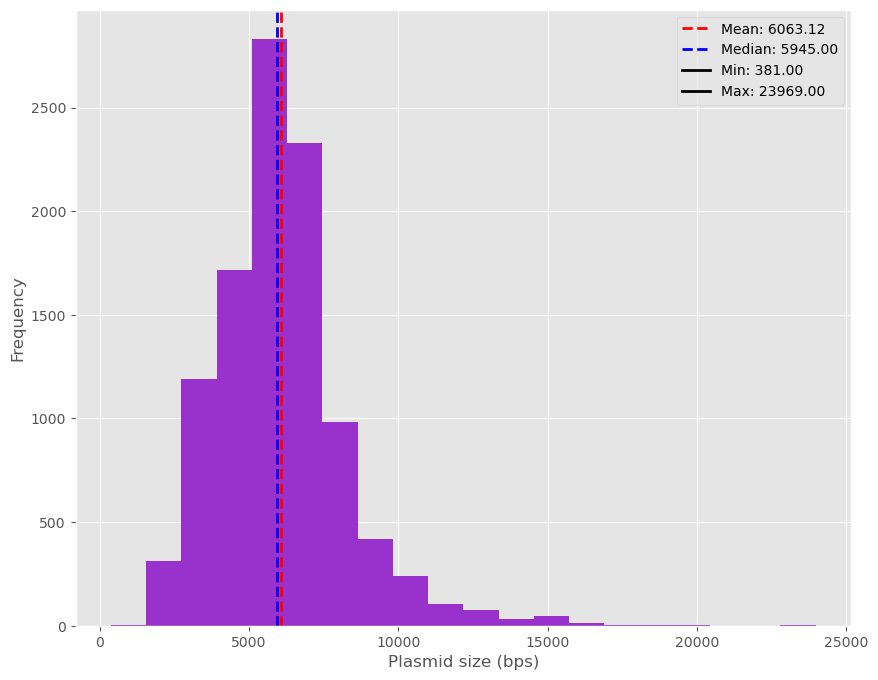

In [8]:
plt.figure(figsize=(10, 8))
plt.hist(sequence_lengths, bins=20, color='darkorchid')
plt.xlabel('Plasmid size (bps)')
plt.ylabel('Frequency')
plt.axvline(mean, color='r', linestyle='dashed', linewidth=2, label=f'Mean: {mean:.2f}')
plt.axvline(median, color='b', linestyle='dashed', linewidth=2, label=f'Median: {median:.2f}')
dummy_min = plt.Line2D([], [], color='black',  linewidth=2, label=f'Min: {min_value:.2f}')
dummy_max = plt.Line2D([], [], color='black', linewidth=2, label=f'Max: {max_value:.2f}')

handles = [plt.Line2D([], [], color='r', linestyle='dashed', linewidth=2, label=f'Mean: {mean:.2f}'),
        plt.Line2D([], [], color='b', linestyle='dashed', linewidth=2, label=f'Median: {median:.2f}'),
        dummy_min, dummy_max]
plt.legend(handles=handles)
plt.savefig("/Users/anastasiiashcherbakova/git_projects/masters_project/figures/plasmid_sixe_distribution.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [9]:
def pad_and_truncate_sequences(sequences, max_len):
    processed_sequences = []
    for seq in sequences:
        if len(seq) > max_len:  # Truncate if longer than max_len
            seq = seq[:max_len]
        elif len(seq) < max_len:  # Pad if shorter than max_len
            seq = list(seq) + [''] * (max_len - len(seq))
        processed_sequences.append(seq)
    
    # Convert the list of lists into a numpy array
    result_array = np.array(processed_sequences, dtype='<U1')
    return result_array

max_len = 6000

result_array = pad_and_truncate_sequences(sequences, max_len)
print(result_array)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (10304,) + inhomogeneous part.

In [ ]:
result_array.shape

In [ ]:
char_to_int = {'A': 0, 'T': 1, 'C': 2, 'G': 3, '': 4}

# Vectorize the mapping function
vectorized_map = np.vectorize(char_to_int.get)

# Map the characters to their corresponding integers
int_sequences = vectorized_map(result_array)

print(int_sequences)

In [ ]:
int_sequences.shape

In [ ]:
pca = PCA(n_components=50)
data_pca = pca.fit_transform(int_sequences)
columns = [f'PC{i+1}' for i in range(50)]
df_pca = pd.DataFrame(data_pca, columns=columns)

plt.figure(figsize=(10, 10))
sns.scatterplot(x='PC1', y='PC2', hue=sequences, data=df_pca)
plt.show()

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(df_pca)

labels = kmeans.labels_

print(kmeans.cluster_centers_)

In [ ]:
NT_embeddings.shape

In [ ]:
pca = PCA(n_components=2)
data_pca_embeddings = pca.fit_transform(NT_embeddings)
# columns = [f'PC{i+1}' for i in range(50)]
data_pca_embeddings = pd.DataFrame(data_pca, columns=['PC1', 'PC2'])

plt.figure(figsize=(10, 10))
sns.scatterplot(x='PC1', y='PC2', data=data_pca_embeddings)
plt.show()

In [64]:
data = pd.read_csv('/Users/anastasiiashcherbakova/git_projects/masters_project/plasmids/1_data_scrapping/plasmid_metadata.csv')

In [65]:
data

,Unnamed: 0,Plasmid ID,Purpose,Depositing Lab,Publication,Backbone,Gene/Insert,Growth in Bacteria,Cloning Information
0,0,49693,Not Available,Depositing Lab Christopher Voigt,Rhodius et al Mol Syst Biol. 2013 Oct 29;9:702...,Vector backbone pVRa; Vector type Bacterial Ex...,Not Available,"Bacterial Resistance(s) Ampicillin, 100 μg/mL;...",Not Available
1,1,87282,Purpose Encodes Hsh155 R294L H331D for express...,Depositing Lab Aaron Hoskins,Carrocci et al Nucleic Acids Res. 2017 Jan 6. ...,Vector backbone pRS414; Backbone manufacturer ...,Not Available,"Bacterial Resistance(s) Ampicillin, 100 μg/mL;...",Not Available
2,2,91257,Purpose Protein expression and purification of...,Depositing Lab Sachdev Sidhu,Teyra et al Structure. 2017 Oct 3;25(10):1598-...,Vector backbone pHH0103; Vector type Bacterial...,Not Available,"Bacterial Resistance(s) Ampicillin, 100 μg/mL;...",Not Available
3,3,91368,Purpose Protein expression and purification of...,Depositing Lab Sachdev Sidhu,Teyra et al Structure. 2017 Oct 3;25(10):1598-...,Vector backbone pHH0103; Vector type Bacterial...,Not Available,"Bacterial Resistance(s) Ampicillin, 100 μg/mL;...",Not Available
4,4,11304,Not Available,Depositing Lab Sung-Hou Kim,Kim et al J Struct Biol. 1998 Jan . 121(1):76-80.,Vector backbone pET21a; Backbone manufacturer ...,Not Available,"Bacterial Resistance(s) Ampicillin, 100 μg/mL;...",Not Available
...,...,...,...,...,...,...,...,...,...
8945,8945,62868,Purpose Bacterial expression of MBP-PPTR-1,Depositing Lab Geraldine Seydoux,Wang et al Elife. 2014 Dec 23;4. doi: 10.7554/...,Vector backbone pMAL-c2X Gateway compatible de...,Not Available,"Bacterial Resistance(s) Ampicillin, 100 μg/mL;...",Not Available
8946,8946,112567,Purpose (Empty Backbone) Used for expression o...,Depositing Lab Marko Hyvönen,Protein expressionists toolkit (unpublished),Vector backbone pOP2S; Vector type Bacterial E...,Not Available,"Bacterial Resistance(s) Ampicillin, 100 μg/mL;...",Not Available
8947,8947,71605,Purpose Produces Acetobacter aceti 1023 N5-car...,Depositing Lab T. J. Kappock,Single Trp variants of Acetobacter aceti PurE ...,Vector backbone pET23a; Backbone size w/o inse...,Not Available,"Bacterial Resistance(s) Ampicillin, 100 μg/mL;...",Not Available
8948,8948,63192,"Purpose (Empty Backbone) pRS426 backbone, cont...",Depositing Lab Jef Boeke,Agmon et al ACS Synth Biol. 2015 Jul 17;4(7):8...,Vector backbone pRS426; Backbone size (bp) 570...,Not Available,"Bacterial Resistance(s) Ampicillin, 100 μg/mL;...",Cloning method Restriction Enzyme; 5′ sequenci...


In [54]:
data = data.drop(columns=['Unnamed: 0'])

In [61]:
data[:8950].to_csv('plasmid_metadata.csv')

In [66]:
data

,Unnamed: 0,Plasmid ID,Purpose,Depositing Lab,Publication,Backbone,Gene/Insert,Growth in Bacteria,Cloning Information
0,0,49693,Not Available,Depositing Lab Christopher Voigt,Rhodius et al Mol Syst Biol. 2013 Oct 29;9:702...,Vector backbone pVRa; Vector type Bacterial Ex...,Not Available,"Bacterial Resistance(s) Ampicillin, 100 μg/mL;...",Not Available
1,1,87282,Purpose Encodes Hsh155 R294L H331D for express...,Depositing Lab Aaron Hoskins,Carrocci et al Nucleic Acids Res. 2017 Jan 6. ...,Vector backbone pRS414; Backbone manufacturer ...,Not Available,"Bacterial Resistance(s) Ampicillin, 100 μg/mL;...",Not Available
2,2,91257,Purpose Protein expression and purification of...,Depositing Lab Sachdev Sidhu,Teyra et al Structure. 2017 Oct 3;25(10):1598-...,Vector backbone pHH0103; Vector type Bacterial...,Not Available,"Bacterial Resistance(s) Ampicillin, 100 μg/mL;...",Not Available
3,3,91368,Purpose Protein expression and purification of...,Depositing Lab Sachdev Sidhu,Teyra et al Structure. 2017 Oct 3;25(10):1598-...,Vector backbone pHH0103; Vector type Bacterial...,Not Available,"Bacterial Resistance(s) Ampicillin, 100 μg/mL;...",Not Available
4,4,11304,Not Available,Depositing Lab Sung-Hou Kim,Kim et al J Struct Biol. 1998 Jan . 121(1):76-80.,Vector backbone pET21a; Backbone manufacturer ...,Not Available,"Bacterial Resistance(s) Ampicillin, 100 μg/mL;...",Not Available
...,...,...,...,...,...,...,...,...,...
8945,8945,62868,Purpose Bacterial expression of MBP-PPTR-1,Depositing Lab Geraldine Seydoux,Wang et al Elife. 2014 Dec 23;4. doi: 10.7554/...,Vector backbone pMAL-c2X Gateway compatible de...,Not Available,"Bacterial Resistance(s) Ampicillin, 100 μg/mL;...",Not Available
8946,8946,112567,Purpose (Empty Backbone) Used for expression o...,Depositing Lab Marko Hyvönen,Protein expressionists toolkit (unpublished),Vector backbone pOP2S; Vector type Bacterial E...,Not Available,"Bacterial Resistance(s) Ampicillin, 100 μg/mL;...",Not Available
8947,8947,71605,Purpose Produces Acetobacter aceti 1023 N5-car...,Depositing Lab T. J. Kappock,Single Trp variants of Acetobacter aceti PurE ...,Vector backbone pET23a; Backbone size w/o inse...,Not Available,"Bacterial Resistance(s) Ampicillin, 100 μg/mL;...",Not Available
8948,8948,63192,"Purpose (Empty Backbone) pRS426 backbone, cont...",Depositing Lab Jef Boeke,Agmon et al ACS Synth Biol. 2015 Jul 17;4(7):8...,Vector backbone pRS426; Backbone size (bp) 570...,Not Available,"Bacterial Resistance(s) Ampicillin, 100 μg/mL;...",Cloning method Restriction Enzyme; 5′ sequenci...


In [20]:
scrapped_ids = np.array(data['Plasmid ID'])

In [23]:
scrapped_ids.dtype

dtype('int64')

In [22]:
len(scrapped_ids)

9000